In [ ]:
import pandas as pd
import numpy  as np
from tqdm import tqdm  #for showing progress bars
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import random
from IPython.display import clear_output

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
x1=pd.read_csv('/content/drive/My Drive/task1/train_data.csv')
y1=pd.read_csv('/content/drive/My Drive/task1/train_label.csv')
inputs = torch.tensor(x1.values, dtype=torch.float32)
targets = torch.tensor(y1.values, dtype=torch.long)


In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_1, hidden_2, output_size):
        super(NeuralNetwork, self).__init__()
        torch.manual_seed(42)
        self.fc1 = nn.Linear(input_size, hidden_1)  # First hidden layer
        self.fc2 = nn.Linear(hidden_1, hidden_2)  # Second hidden layer
        self.fc3 = nn.Linear(hidden_2, output_size)  # Output layer
        self.tanh = nn.Tanh()
        # tanh and softmax are activation fucntions

    def forward(self, x):
        x = self.tanh(self.fc1(x))# tanh after h1
        x = self.tanh(self.fc2(x)) #tanh after h2
        x = self.fc3(x)
        return x # x is the output feature vector given by the model

In [ ]:
def plot(loss_array, title_):
  plt.clf()
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.title(f"Loss Curve During Training - {title_}")
  plt.plot(list(range(len(loss_array))), loss_array, label="Training Loss", color ="blue")
  plt.legend()
  plt.show()
  print(loss_array)

In [ ]:
#Hyper parameters
criterion = nn.CrossEntropyLoss() #loss function
learning_rate = 0.002
max_epochs = 1000
thershold_error = 0.00005


In [ ]:
#ADAM

In [ ]:
model_adam = NeuralNetwork(input_size=36, hidden_1=20, hidden_2=10, output_size=5)
optimiser_adam = optim.Adam(model_adam.parameters(), lr=learning_rate)
loss_adam=[]

In [ ]:
#Training :
error = 0
no_epoch =0
past_error = 1000.0000000000


for epoch in tqdm(range(max_epochs), desc="Training Progress", unit="epoch"):
    error = 0
    indices = list(range(len(inputs)))  # Create a list of indices
    random.shuffle(indices)
    for i in indices:
        x = inputs[i].unsqueeze(0)  # Get input sample (reshape to batch)
        y = targets[i]  # Get target value

        # Forward pass
        optimiser_adam.zero_grad()
        output = model_adam(x)
        loss = criterion(output, y)

        # Compute weight updates manually using Delta Rule
        loss.backward()  # Compute gradients
        optimiser_adam.step()

        error += loss.item()

    avg_loss = error / len(inputs)  # Compute average loss per epoch
    loss_adam.append(avg_loss)
    no_epoch += 1

    if abs(past_error-avg_loss) < thershold_error :
        break
    past_error = avg_loss

Training Progress:  11%|█         | 112/1000 [04:37<36:43,  2.48s/epoch]


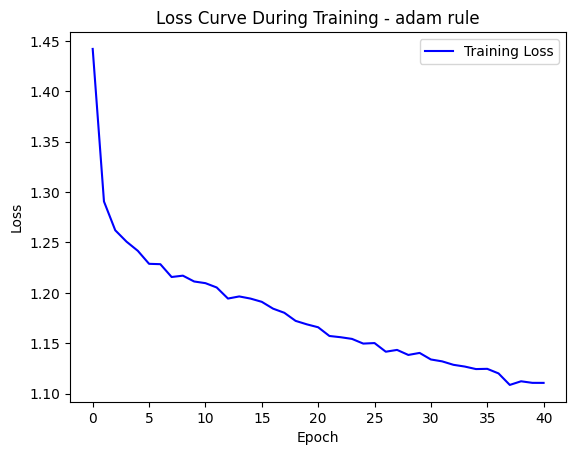

[1.4419449074692343, 1.2906148600326353, 1.2620536461584326, 1.2507560591606155, 1.241692339079925, 1.228782946561622, 1.2284187402812883, 1.2157072077368785, 1.2170309143596556, 1.2112491209527712, 1.209595594037065, 1.205309302792542, 1.1943165011305164, 1.196423574717433, 1.1942880714164041, 1.1910737293896794, 1.1843116467239978, 1.1801996658155027, 1.1721827712826889, 1.168726102747638, 1.165841455229853, 1.157193198465575, 1.1559561837321075, 1.1543032628078276, 1.1496480094569885, 1.1501724229526407, 1.1415954437824325, 1.143372548340618, 1.1383844756257122, 1.1403941899424361, 1.13389357217793, 1.132017198841033, 1.1286027784211903, 1.1268778299869016, 1.124367932879877, 1.1246083815558336, 1.1200749391355385, 1.1086491415125241, 1.1122605908848904, 1.1107066566343062, 1.1106756376559144]
1.1107066566343062


In [ ]:
plot(loss_adam, "adam rule")
print(past_error)

In [ ]:
#ADAGRAD

In [ ]:
model_adagrad = NeuralNetwork(input_size=36, hidden_1=20, hidden_2=10, output_size=5)
optimiser_adagrad = optim.Adagrad(model_adagrad.parameters(), lr=learning_rate)
loss_adagrad=[]

In [ ]:
#Training :
error = 0
no_epoch =0
past_error = 1000.00000000


for epoch in tqdm(range(max_epochs), desc="Training Progress", unit="epoch"):
    error = 0
    indices = list(range(len(inputs)))  # Create a list of indices
    random.shuffle(indices)
    for i in indices:
        x = inputs[i].unsqueeze(0)  # Get input sample (reshape to batch)
        y = targets[i]  # Get target value

        # Forward pass
        optimiser_adagrad.zero_grad()
        output = model_adagrad(x)
        loss = criterion(output, y)

        # Compute weight updates manually using Delta Rule
        loss.backward()  # Compute gradients
        optimiser_adagrad.step()

        error += loss.item()

    avg_loss = error / len(inputs)  # Compute average loss per epoch
    loss_adagrad.append(avg_loss)
    no_epoch += 1

    if abs(past_error-avg_loss) < thershold_error :
        break
    past_error = avg_loss

Training Progress:  51%|█████     | 507/1000 [17:21<16:52,  2.05s/epoch]


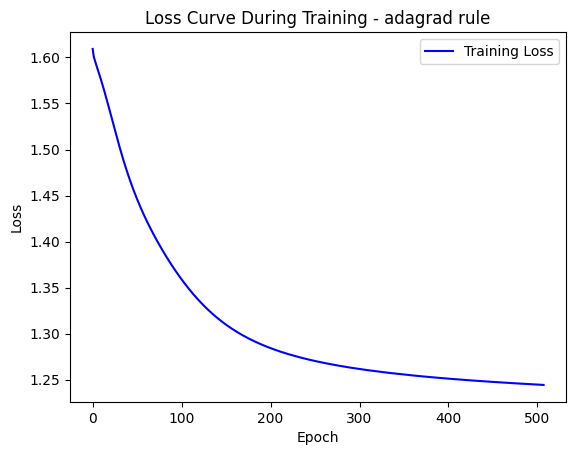

[1.609254710551439, 1.6020238249823116, 1.5981639650477475, 1.5949413767452536, 1.591913937627822, 1.5889561569291153, 1.5859990290488644, 1.5830030122836152, 1.5799528964463923, 1.5768481619421275, 1.5736729488663819, 1.5704379585040933, 1.5671387183898804, 1.5637807041600444, 1.5603692188091192, 1.5569065319650945, 1.5533951360503098, 1.5498610476722354, 1.5462883353054433, 1.5426886582326864, 1.5390846556338624, 1.5354575619153705, 1.5318363913898172, 1.5282195848545592, 1.5246166657542752, 1.521021926325521, 1.517452485564949, 1.5139109875155188, 1.5103851795613974, 1.5069323150201581, 1.503501031326019, 1.5001134416531061, 1.4967769029857279, 1.4934904946572427, 1.4902517495005057, 1.4870651536670072, 1.4839423902932856, 1.4808728722645796, 1.4778588860257975, 1.474897131629441, 1.4719862106175587, 1.4691549046687211, 1.4663621973639551, 1.4636236513000898, 1.4609380362032651, 1.458308238754158, 1.4557199140469272, 1.4531885805936262, 1.4507048878149726, 1.4482502536871482, 1.4458

In [ ]:
plot(loss_adagrad, "adagrad rule")
print(past_error)

In [ ]:
#RMS PROP

In [ ]:
model_rms = NeuralNetwork(input_size=36, hidden_1=20, hidden_2=10, output_size=5)
optimiser_rms = optim.RMSprop(model_rms.parameters(), lr=learning_rate)
loss_rms=[]

In [ ]:
#Training :
error = 0
no_epoch =0
past_error = 1000.000000


for epoch in tqdm(range(max_epochs), desc="Training Progress", unit="epoch"):
    error = 0
    indices = list(range(len(inputs)))  # Create a list of indices
    random.shuffle(indices)
    for i in indices:
        x = inputs[i].unsqueeze(0)  # Get input sample (reshape to batch)
        y = targets[i]  # Get target value

        # Forward pass
        optimiser_rms.zero_grad()
        output = model_rms(x)
        loss = criterion(output, y)

        # Compute weight updates manually using Delta Rule
        loss.backward()  # Compute gradients
        optimiser_rms.step()

        error += loss.item()

    avg_loss = error / len(inputs)  # Compute average loss per epoch
    loss_rms.append(avg_loss)
    no_epoch += 1

    if abs(past_error-avg_loss) < thershold_error  :
        break
    past_error = avg_loss

Training Progress:  11%|█         | 112/1000 [04:03<32:08,  2.17s/epoch]


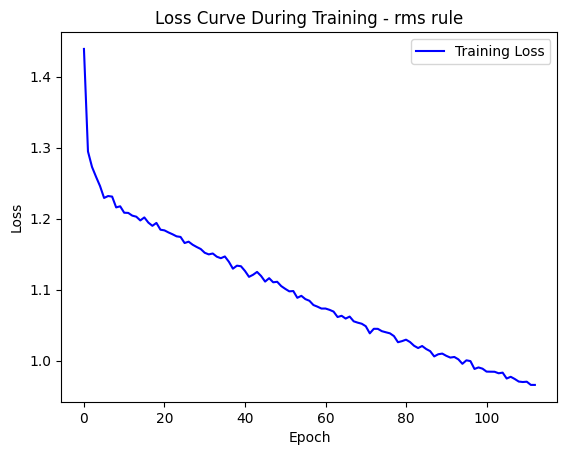

[1.439155718925716, 1.294767757861867, 1.273004582199292, 1.2591330501408862, 1.2459780672167229, 1.2292817302622188, 1.2319714566091706, 1.231205278624589, 1.215979123032424, 1.2175293616603886, 1.2084828645900347, 1.2082231047229208, 1.204399071518274, 1.2028985576719984, 1.1976338832948046, 1.2018612560337636, 1.19456034876395, 1.1900497642143062, 1.1941197416006684, 1.1845839420438797, 1.183619413605, 1.1807061813672954, 1.178156207292795, 1.1752385860667742, 1.174386307655863, 1.1658191400439875, 1.1677029330018776, 1.1634190844510752, 1.1602427119397563, 1.157399888115452, 1.1520826997810332, 1.149818617181518, 1.1510677991734035, 1.1465705341485708, 1.1444251632439966, 1.1468933515479902, 1.1394130933564854, 1.1296842164821688, 1.1339181255900477, 1.133126502632517, 1.1264471782663983, 1.1181757246540591, 1.1210858799724943, 1.1251137994650031, 1.1193963736146615, 1.1115134873582593, 1.1162918074333248, 1.1105118479287106, 1.1112254193227826, 1.1051631501436479, 1.10127966957289

In [ ]:
plot(loss_rms, "rms rule")
print(past_error)

In [ ]:
#DELTA RULES

In [ ]:
model_grad = NeuralNetwork(input_size=36, hidden_1=20, hidden_2=10, output_size=5)
optimiser_grad = optim.SGD(model_grad.parameters(), lr=learning_rate)
loss_grad=[]

In [ ]:
#Training :
error = 0
no_epoch =0
past_error = 1000.000000


for epoch in tqdm(range(max_epochs), desc="Training Progress", unit="epoch"):
    error = 0
    indices = list(range(len(inputs)))  # Create a list of indices
    random.shuffle(indices)
    for i in indices:
        x = inputs[i].unsqueeze(0)  # Get input sample (reshape to batch)
        y = targets[i]  # Get target value

        # Forward pass
        optimiser_grad.zero_grad()
        output = model_grad(x)
        loss = criterion(output, y)

        # Compute weight updates manually using Delta Rule
        loss.backward()  # Compute gradients
        optimiser_grad.step()

        error += loss.item()

    avg_loss = error / len(inputs)  # Compute average loss per epoch
    loss_grad.append(avg_loss)
    no_epoch += 1

    if abs(past_error-avg_loss) < thershold_error  :
        break
    past_error = avg_loss

Training Progress:  10%|▉         | 95/1000 [02:17<21:50,  1.45s/epoch]


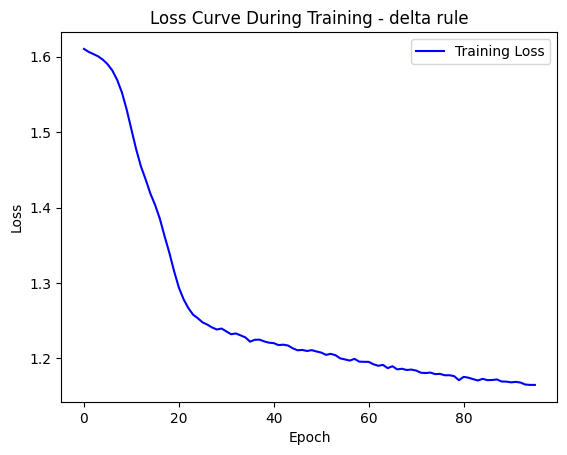

[1.6104172154508154, 1.6064635131763423, 1.6035649607693212, 1.600545664022063, 1.5960323309647912, 1.5899882328516248, 1.5815983095903765, 1.569301770769876, 1.5526423415522268, 1.5300535043517967, 1.5035939209010376, 1.4772433222771406, 1.4546644652617342, 1.4371779086725183, 1.4184611483312595, 1.4032330403943967, 1.3848768969426577, 1.361713993845283, 1.339751589851358, 1.315381985819298, 1.2937119197791789, 1.2781762850842158, 1.2665642550985714, 1.2577582097772122, 1.2530312861030313, 1.2475973271120484, 1.2446176066674133, 1.2408381185944883, 1.2381393109588488, 1.2394121759601417, 1.2356483168478845, 1.2318740897476972, 1.23289523415711, 1.230362811746852, 1.227702347394927, 1.222035612853215, 1.2245342089175402, 1.2246607248897312, 1.2223270485506557, 1.220660447906619, 1.220050797108682, 1.217480750951083, 1.218010673210912, 1.2168911719278224, 1.2132054072501453, 1.2105906225066294, 1.2110068293035836, 1.2096612115631467, 1.2107632010839713, 1.2089724259981218, 1.20749886916

In [ ]:
plot(loss_grad, "delta rule")
print(past_error)

In [ ]:
#Generalised delta rules

In [ ]:
model_gen_grad = NeuralNetwork(input_size=36, hidden_1=20, hidden_2=10, output_size=5)
optimiser_gen_grad = optim.SGD(model_gen_grad.parameters(), lr=learning_rate, momentum = 0.1)
loss_gen_grad=[]

In [ ]:
#Training :
error = 0
no_epoch =0
past_error = 1000.00000


for epoch in tqdm(range(max_epochs), desc="Training Progress", unit="epoch"):
    error = 0
    indices = list(range(len(inputs)))  # Create a list of indices
    random.shuffle(indices)
    for i in indices:
        x = inputs[i].unsqueeze(0)  # Get input sample (reshape to batch)
        y = targets[i]  # Get target value

        # Forward pass
        optimiser_gen_grad.zero_grad()
        output = model_gen_grad(x)
        loss = criterion(output, y)

        # Compute weight updates manually using Delta Rule
        loss.backward()  # Compute gradients
        optimiser_gen_grad.step()

        error += loss.item()

    avg_loss = error / len(inputs)  # Compute average loss per epoch
    loss_gen_grad.append(avg_loss)
    no_epoch += 1

    if abs(past_error-avg_loss) < thershold_error :
        break
    past_error = avg_loss

Training Progress:   9%|▉         | 89/1000 [02:34<26:26,  1.74s/epoch]


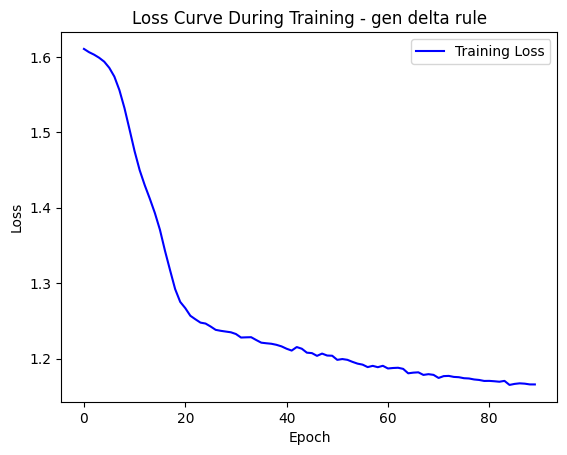

[1.6105118480666152, 1.6062116306265812, 1.6029065175912809, 1.5988093332507243, 1.5936289047705883, 1.5854848242807889, 1.573882820309252, 1.5559080037073592, 1.53204840019144, 1.5037480545616435, 1.4748827548638888, 1.4498309868016561, 1.42991071038988, 1.4120710228177056, 1.3930338021365924, 1.3708294707426374, 1.3429009264009841, 1.3172632447290624, 1.2922592481981223, 1.2752978650330304, 1.267038340200896, 1.25692966558028, 1.2522413633491707, 1.2478366651874653, 1.2466055932582887, 1.2426901177250187, 1.2382575530575597, 1.236970208400768, 1.2359737462236948, 1.2350190921708486, 1.232720693656285, 1.2280742340982556, 1.2283281929131267, 1.2285088420626131, 1.2247762402231661, 1.2212562272702532, 1.220470832151106, 1.2198095858682239, 1.2184048641310923, 1.2163449367988164, 1.213221710566627, 1.2107875656649627, 1.2154496016503573, 1.2132435170183515, 1.2080054409492607, 1.207419252559811, 1.2037677403992268, 1.2067960712065424, 1.2042252633854813, 1.203948265739184, 1.19847941801

In [ ]:
plot(loss_gen_grad, "gen delta rule")
print(past_error)

In [ ]:
#Confusion matrices
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
test_i = torch.tensor(pd.read_csv('/content/drive/My Drive/task1/test_data.csv').values, dtype=torch.float32)
test_o = torch.tensor(pd.read_csv('/content/drive/My Drive/task1/test_label.csv').values, dtype=torch.long)

In [ ]:
desired = targets.numpy()
test_o = test_o.numpy()

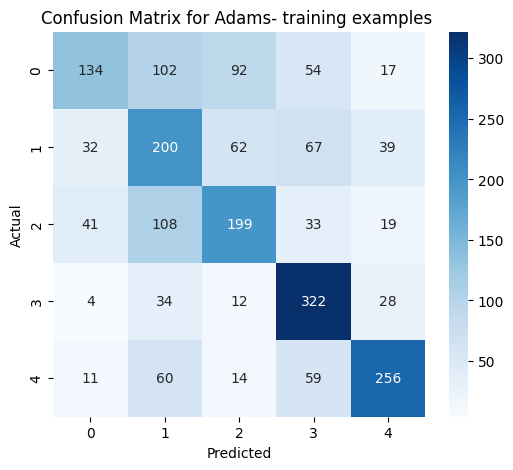

In [ ]:
#adams
adam_op = model_adam(inputs)
predictions_adam = torch.argmax(adam_op, dim=1)
pred_adam = predictions_adam.numpy()
cm_adam = confusion_matrix(desired, pred_adam)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_adam, annot=True, fmt="d", cmap="Blues",
            xticklabels=range(5), yticklabels=range(5))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Adams- training examples ")
plt.show()

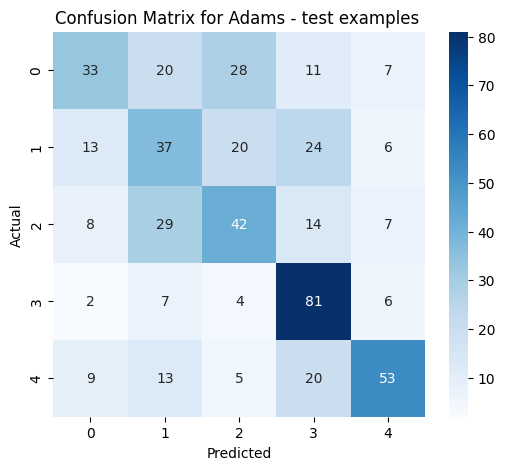

In [ ]:
adam_op_t = model_adam(test_i)
predictions_adam_t = torch.argmax(adam_op_t, dim=1)
pred_adam_t = predictions_adam_t.numpy()
cm_adam_t = confusion_matrix(test_o, pred_adam_t)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_adam_t, annot=True, fmt="d", cmap="Blues",
            xticklabels=range(5), yticklabels=range(5))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Adams - test examples ")
plt.show()

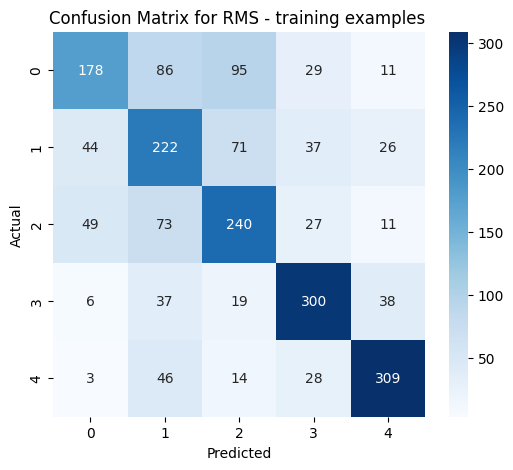

In [ ]:
#rms
rms_op = model_rms(inputs)
predictions_rms = torch.argmax(rms_op, dim=1)
pred_rms = predictions_rms.numpy()
cm_rms = confusion_matrix(desired, pred_rms)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rms, annot=True, fmt="d", cmap="Blues",
            xticklabels=range(5), yticklabels=range(5))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for RMS - training examples ")
plt.show()

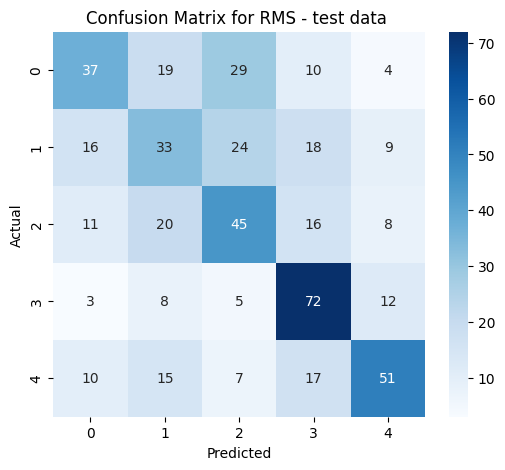

In [ ]:
rms_op_t = model_rms(test_i)
predictions_rms_t = torch.argmax(rms_op_t, dim=1)
pred_rms_t = predictions_rms_t.numpy()
cm_rms_t = confusion_matrix(test_o, pred_rms_t)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rms_t, annot=True, fmt="d", cmap="Blues",
            xticklabels=range(5), yticklabels=range(5))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for RMS - test data ")
plt.show()

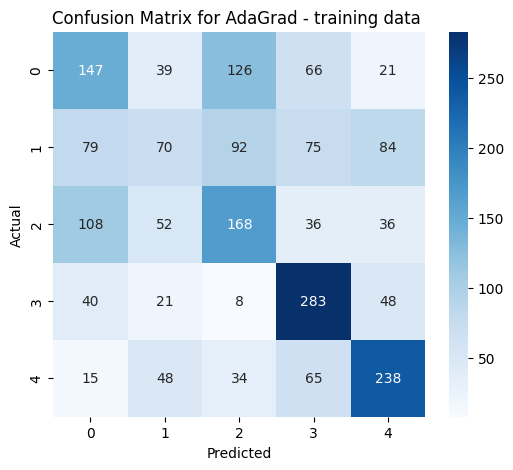

In [ ]:
#adagrad
adagrad_op = model_adagrad(inputs)
predictions_adagrad = torch.argmax(adagrad_op, dim=1)
pred_adagrad = predictions_adagrad.numpy()
cm_adagrad = confusion_matrix(desired, pred_adagrad)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_adagrad, annot=True, fmt="d", cmap="Blues",
            xticklabels=range(5), yticklabels=range(5))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for AdaGrad - training data ")
plt.show()

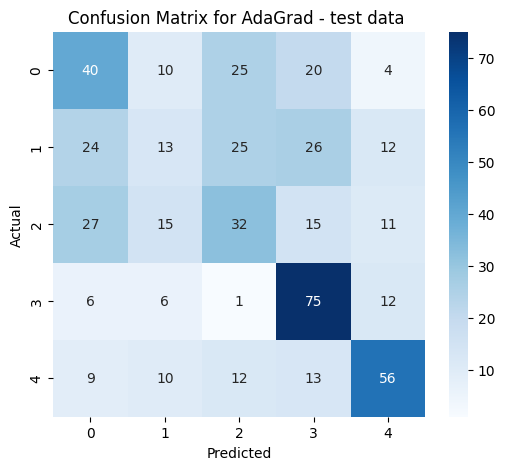

In [ ]:
adagrad_op_t = model_adagrad(test_i)
predictions_adagrad_t = torch.argmax(adagrad_op_t, dim=1)
pred_adagrad_t = predictions_adagrad_t.numpy()
cm_adagrad_t = confusion_matrix(test_o, pred_adagrad_t)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_adagrad_t, annot=True, fmt="d", cmap="Blues",
            xticklabels=range(5), yticklabels=range(5))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for AdaGrad - test data ")
plt.show()

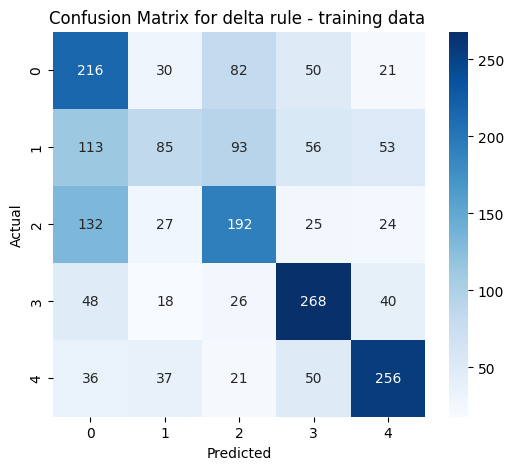

In [ ]:
#delta
delta_op = model_grad(inputs)
predictions_delta = torch.argmax(delta_op, dim=1)
pred_delta = predictions_delta.numpy()
cm_delta = confusion_matrix(desired, pred_delta)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_delta, annot=True, fmt="d", cmap="Blues",
            xticklabels=range(5), yticklabels=range(5))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for delta rule - training data ")
plt.show()

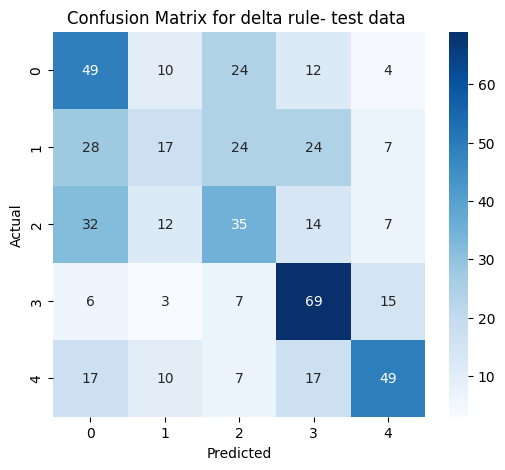

In [ ]:
delta_op_t = model_grad(test_i)
predictions_delta_t = torch.argmax(delta_op_t, dim=1)
pred_delta_t = predictions_delta_t.numpy()
cm_delta_t = confusion_matrix(test_o, pred_delta_t)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_delta_t, annot=True, fmt="d", cmap="Blues",
            xticklabels=range(5), yticklabels=range(5))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for delta rule- test data ")
plt.show()

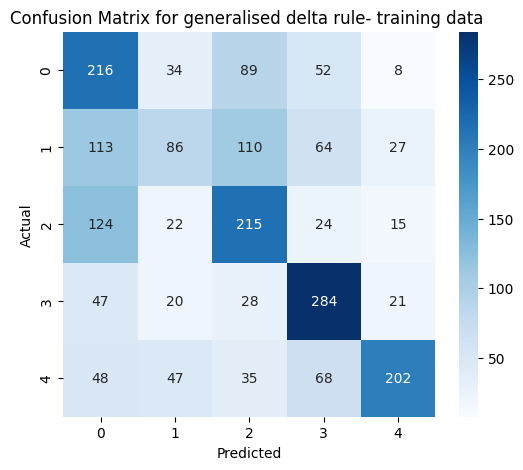

In [ ]:
#generlaised delta rule
gen_delta_op = model_gen_grad(inputs)
predictions_gen_delta = torch.argmax(gen_delta_op, dim=1)
pred_gen_delta = predictions_gen_delta.numpy()
cm_gen_delta = confusion_matrix(desired, pred_gen_delta)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_gen_delta, annot=True, fmt="d", cmap="Blues",
            xticklabels=range(5), yticklabels=range(5))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for generalised delta rule- training data ")
plt.show()

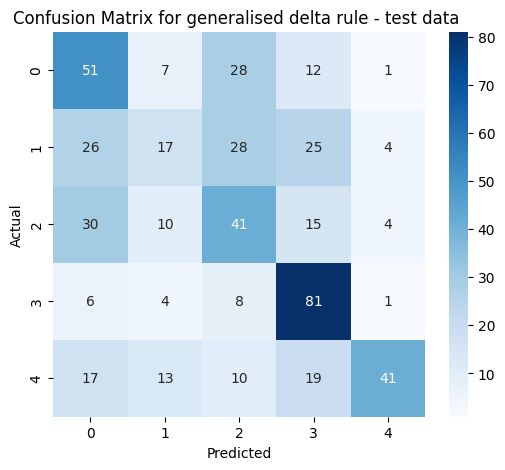

In [ ]:
gen_delta_op_t = model_gen_grad(test_i)
predictions_gen_delta_t = torch.argmax(gen_delta_op_t, dim=1)
pred_gen_delta_t = predictions_gen_delta_t.numpy()
cm_gen_delta_t = confusion_matrix(test_o, pred_gen_delta_t)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_gen_delta_t, annot=True, fmt="d", cmap="Blues",
            xticklabels=range(5), yticklabels=range(5))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for generalised delta rule - test data ")
plt.show()